In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
nwords = 5000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = nwords)

In [4]:
def encode(data, dimension = nwords):
  result = np.zeros((len(data), dimension))
  for i, l in enumerate(data):
    for w in l:
      result[i, w] =1.            # krotka wymusza float 
  return result

x_train = encode(train_data)
x_test = encode(test_data) 
x_test, x_train

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]), array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]))

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
y_train.mean(), y_test.mean()

(0.5, 0.5)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from tensorflow import keras
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", metrics = ["accuracy"], loss = "binary_crossentropy")

In [8]:
x_val = x_train[:1000]
x_part_train = x_train[1000:]
y_val = y_train[:1000]
y_part_train = y_train[1000:]

In [9]:
#validation_data sledzimy blad i fukcje straty na danych walidacyjnych
history = model.fit(x_part_train, y_part_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val) )

Epoch 1/10
188/188 [==============================] - 3s 8ms/step - loss: 0.3745 - accuracy: 0.8462 - val_loss: 0.2667 - val_accuracy: 0.8880
Epoch 2/10
188/188 [==============================] - 1s 7ms/step - loss: 0.2394 - accuracy: 0.9078 - val_loss: 0.2539 - val_accuracy: 0.8990
Epoch 3/10
188/188 [==============================] - 2s 9ms/step - loss: 0.2074 - accuracy: 0.9193 - val_loss: 0.3070 - val_accuracy: 0.8680
Epoch 4/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1889 - accuracy: 0.9285 - val_loss: 0.2737 - val_accuracy: 0.8960
Epoch 5/10
188/188 [==============================] - 1s 7ms/step - loss: 0.1702 - accuracy: 0.9352 - val_loss: 0.3194 - val_accuracy: 0.8760
Epoch 6/10
188/188 [==============================] - 1s 7ms/step - loss: 0.1511 - accuracy: 0.9442 - val_loss: 0.3107 - val_accuracy: 0.8910
Epoch 7/10
188/188 [==============================] - 1s 7ms/step - loss: 0.1327 - accuracy: 0.9515 - val_loss: 0.3707 - val_accuracy: 0.8810
Epoch

In [10]:
history_dict = history.history

def makeGraph(fname):
  train_values = history_dict[fname]
  val_values = history_dict["val_" + fname]
  epochs = range(1, len(val_values) + 1)
  plt.plot(epochs, train_values, label = ("training " + fname))
  plt.plot(epochs, val_values, label = ("validation " + fname))
  plt.title("Training vs validation " + fname)
  plt.xlabel = ("epoch")
  plt.ylabel = (fname)
  plt.legend()
  

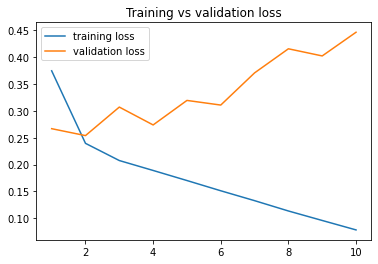

In [11]:
makeGraph("loss")

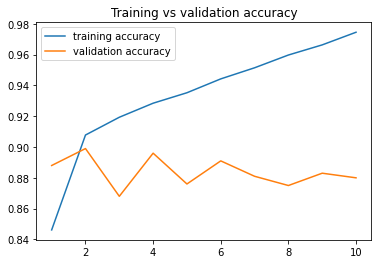

In [12]:
makeGraph("accuracy")

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", metrics = ["accuracy"], loss = "binary_crossentropy")
model.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
196/196 [==============================] - 2s 7ms/step - loss: 0.3632 - accuracy: 0.8519
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 0.2355 - accuracy: 0.9081
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.2041 - accuracy: 0.9214
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 0.1834 - accuracy: 0.9303
Epoch 5/10
196/196 [==============================] - 1s 6ms/step - loss: 0.1639 - accuracy: 0.9384
Epoch 6/10
196/196 [==============================] - 1s 6ms/step - loss: 0.1450 - accuracy: 0.9457
Epoch 7/10
196/196 [==============================] - 1s 6ms/step - loss: 0.1264 - accuracy: 0.9546
Epoch 8/10
196/196 [==============================] - 1s 6ms/step - loss: 0.1066 - accuracy: 0.9627
Epoch 9/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0858 - accuracy: 0.9719
Epoch 10/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0697 - accuracy: 0.979

In [16]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.5705 - accuracy: 0.8585


[0.5704576373100281, 0.858519971370697]

In [9]:
# 10 tys atrybutow, ja mam 5

In [18]:
from sklearn.naive_bayes import BernoulliNB

model1 = BernoulliNB()

model1.fit(x_train, y_train)

BernoulliNB()

In [20]:
predicted1 = model1.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicted1)

0.8418